## I've left the hungarian comments in the code, my own comments and the sollution is in 6th, 7th and 10th cell between the # HF2 start mini-batch and the # HF2 end mini-batch comments.

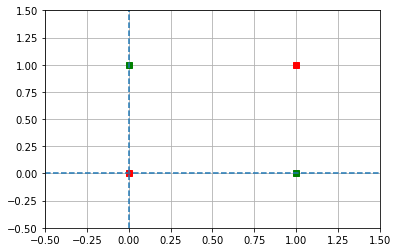

In [1]:
# A notebook alapú megjelenítés aktiválása
%matplotlib inline
import matplotlib.pyplot as plt # Pylab grafikus megjelenítocsomag importálása

# "Igaz" logikai értékek megadása
true_x = [1, 0]
true_y = [0, 1]

# "Hamis" logikai értékek megadása
false_x = [0, 1]
false_y = [0, 1]

# Jelöljük pirossal a hamis logikai értékeket, zölddel pedig az igazakat.
plot1 = plt.plot(true_x, true_y,'gs')
plot2 = plt.plot(false_x, false_y, 'rs')

# A jobb ábrázálhatóság miatt, szélesebb tartományokat jelenítünk meg
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Négyzetrács megjelenítése
plt.grid(True)

# Az x és y tengely megjelenítése
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')

# Az ábra kirajzolása
plt.show()

In [2]:
import numpy as np
from sklearn import preprocessing
import copy

In [3]:
def activation(x):
    return 1 / (1 + np.exp(-x))

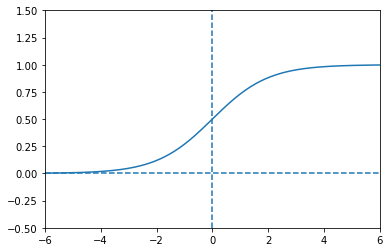

In [4]:
segedX=np.linspace(-6,6,200)
# A jobb ábrázálhatóság miatt, szélesebb tartományokat jelenítünk meg
plt.xlim(-6, 6)
plt.ylim(-0.5, 1.5)
# Az x és y tengely megjelenítése
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.plot(segedX,activation(segedX))

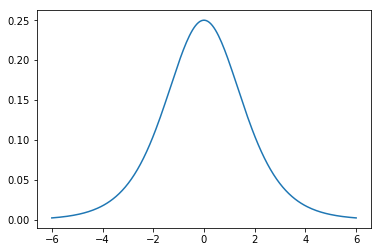

In [5]:
def dactivation(x):
    return np.exp(-x)/((1+np.exp(-x))**2)
plt.plot(segedX,dactivation(segedX))

In [6]:
# MLP osztály létrehozása.
class MLP:
    
    # A hálózat inicializálása az argumentumként megadott méretek alapján.
    def __init__(self, *args):
        # random seed megadása
        np.random.seed(123)
        # A hálózat formája (rétegek száma), amely megegyezik a paraméterek számával
        self.shape = args
        n = len(args)
        # Rétegek létrehozása
        self.layers = []
        
        
        
        #HF2 start mini-batch
        
        # Stores the results of the forward propagation
        self.layer_batch = []
        
        #HF2 end mini-batch
        
        
        
        
        
        # Bemeneti réteg létrehozása (+1 egység a BIAS-nak)
        self.layers.append(np.ones(self.shape[0]+1))
        # Rejtett réteg(ek) és a kimeneti réteg létrehozása
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))
        # Súlymátrix létrehozása
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,
                                         self.layers[i+1].size)))
        # dw fogja tartalmazni a súlyok utolsó módosításait (később pl. a momentum módszer számára)
        self.dw = [0,]*len(self.weights)
        # Súlyok újrainicializálása
        self.reset()
    
    # Súlyok újrainicializálási függvényének definiálása
    def reset(self):
        for i in range(len(self.weights)):
            # véletlen számok [0,1) tartományban 
            Z = np.random.random((self.layers[i].size,self.layers[i+1].size))
            # átskálázzuk a súlyokat -1..1 tartományba
            self.weights[i][...] = (2*Z-1)*1

            
            
            
    
    
    # HF2 start mini-batch
    
    
    # Function for forward propagation with one element (data is just an element, not a whole batch)
    def propagate_forward_single(self, data):
        # Bemeneti réteg beállítása (tanító adatok)
        self.layers[0][0:-1] = data
        # Az adatok végigküldése a bemeneti rétegtől az utolsó előtti rétegig (az utolsó ugyanis a kimeneti réteg).
        # A szigmoid aktivációs függvény használatával, mátrixszorzások alkalmazásával.
        # Az előadáson a "layers" változót jelöltük "a"-val.
        for i in range(1,len(self.shape)):
            self.layers[i][...] = activation(np.dot(self.layers[i-1],self.weights[i-1]))
        # Visszatérés a hálózat által becsült eredménnyel
        return self.layers[-1]


    # Function for forward propagation with a mini batch (data is a list)
    def propagate_forward(self, data):
        
        # Iterates through the batch, run a forward propagation with every element in the batch one by one
        for single_data in data:
        
            # Bemeneti réteg beállítása (tanító adatok)
            self.layers[0][0:-1] = single_data
            # Az adatok végigküldése a bemeneti rétegtől az utolsó előtti rétegig (az utolsó ugyanis a kimeneti réteg).
            # A szigmoid aktivációs függvény használatával, mátrixszorzások alkalmazásával.
            # Az előadáson a "layers" változót jelöltük "a"-val.
            for i in range(1,len(self.shape)):
                self.layers[i][...] = activation(np.dot(self.layers[i-1],self.weights[i-1]))
                
            # Stores the result of the forward propagation in the layer_batch array
            self.layer_batch.append(self.layers[-1])
            
        # Returns with the list of results
        return self.layer_batch

            

    
    
    def propagate_backward(self, target, lrate=0.1):
        deltas = []
           
        # Sums up the batch's errors
        error = -(target[0]-self.layer_batch[0])
        for target_idx in range(1, len(target)):
            error += -(target[target_idx]-self.layer_batch[target_idx]) # y-y_kalap
            
        #Calculates the error
        error *= 1/len(target)
        
        #HF2 end mini-batch
        
        
            
        # error*dactivation(s(3))
        delta = np.multiply(error,dactivation(np.dot(self.layers[-2],self.weights[-1])))
        deltas.append(delta)
        # Gradiens kiszámítása a rejtett réteg(ek)ben
        for i in range(len(self.shape)-2,0,-1):
            # pl. utolsó rejtett réteg: delta(3)*(W(2).T)*dactivation(s(2)) (lásd előadás)
            delta=np.dot(deltas[0],self.weights[i].T)*dactivation(np.dot(self.layers[i-1],self.weights[i-1]))
            deltas.insert(0,delta)            
        # Súlyok módosítása
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            # pl. utolsó rétegben: delta(3)*a(2) (lásd előadás)
            dw = -lrate*np.dot(layer.T,delta)
            # súlyok módosítása
            self.weights[i] += dw 

            # a súlymódosítás eltárolása
            self.dw[i] = dw

        # Visszatérés a hibával
        return (error**2).sum()

In [7]:
def learn(network, X, Y, valid_split, test_split, epochs=20, lrate=0.1):

        # train-validation-test minták különválasztása
        X_train = X[0:int(nb_samples*(1-valid_split-test_split))]
        Y_train = Y[0:int(nb_samples*(1-valid_split-test_split))]
        X_valid = X[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
        Y_valid = Y[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
        X_test  = X[int(nb_samples*(1-test_split)):]
        Y_test  = Y[int(nb_samples*(1-test_split)):]
    
        # standardizálás
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test  = scaler.transform(X_test)
    
        # ugyanolyan sorrendben keverjük be a bemeneteket és kimeneteket, a három külön adatbázisra
        randperm = np.random.permutation(len(X_train))
        X_train, Y_train = X_train[randperm], Y_train[randperm]
        randperm = np.random.permutation(len(X_valid))
        X_valid, Y_valid = X_valid[randperm], Y_valid[randperm]
        randperm = np.random.permutation(len(X_test))
        X_test, Y_test = X_test[randperm], Y_test[randperm]
        
        
        
        
        
        # HF2 start mini-batch
        
        
        # Our training samples contain 704 elements, witch can be devided into 44 slices (all of them contain 16 values)
        
        # Index of the first element in X_train (Y_train) which is not in batches_X (batches_Y) yet
        batch_end = 16;
        
        # batches_X and batches_Y contain 44 lists (batches), all of them have 16 elements
        batches_X = []
        batches_Y = []
        
        
        tmp_batch_X = []
        tmp_batch_Y = []
        
        # Iterates through the training set and slice it into mini batches
        while batch_end <= len(X_train):
            for i in range(batch_end-16, batch_end):
                tmp_batch_X.append(X_train[i])
                tmp_batch_Y.append(Y_train[i])
                
            batches_X.append(tmp_batch_X.copy())
            batches_Y.append(tmp_batch_Y.copy())
            
            tmp_batch_X.clear()
            tmp_batch_Y.clear()
            batch_end += 16;
            
            
            
        best_valid_err = np.inf
        es_counter = 0 # early stopping counter
        best_model = network
    
    
    
        for i in range(epochs):
            train_err = 0
            
            
            # Go through all batches
            for k in range(len(batches_X)):
                
                #Call the forward propagating function with a whole batch
                network.propagate_forward( batches_X[k] )
                train_err += network.propagate_backward( batches_Y[k], lrate )
            train_err /= len(batches_X)

            
        #HF2 end mini-batch
            
            
            
            
            
            # validációs fázis
            valid_err = 0
            o_valid = np.zeros(X_valid.shape[0])
            for k in range(X_valid.shape[0]):
                o_valid[k] = network.propagate_forward_single(X_valid[k])
                valid_err += (o_valid[k]-Y_valid[k])**2
            valid_err /= X_valid.shape[0]

            print("%d epoch, train_err: %.4f, valid_err: %.4f" % (i, train_err, valid_err))

        # Tesztelési fázis
        print("\n--- TESZTELÉS ---\n")
        test_err = 0
        o_test = np.zeros(X_test.shape[0])
        for k in range(X_test.shape[0]):
            o_test[k] = network.propagate_forward_single(X_test[k])
            test_err += (o_test[k]-Y_test[k])**2
            print(k, X_test[k], '%.2f' % o_test[k], ' (elvart eredmeny: %.2f)' % Y_test[k])
        test_err /= X_test.shape[0]

        fig1=plt.figure()
        plt.scatter(X_test[:,0], X_test[:,1], c=np.round(o_test[:]), cmap=plt.cm.cool)

In [8]:
# Mesterséges neurális hálózat létrehozása, 2 bemenettel, 10 rejtett neuronnal és 1 kimenettel
network = MLP(2,10,1)

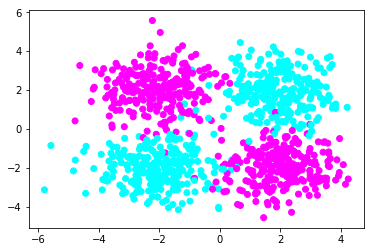

In [9]:
# Tanító, validációs és teszt adatok megadása a rendszernek (zajjal terhelt XOR adatok)
nb_samples=1000
X = np.zeros((nb_samples,2))
Y = np.zeros(nb_samples)
for i in range(0,nb_samples,4):
    noise = np.random.normal(0,1,8)
    X[i], Y[i] = (-2+noise[0],-2+noise[1]), 0
    X[i+1], Y[i+1] = (2+noise[2],-2+noise[3]), 1
    X[i+2], Y[i+2] = (-2+noise[4],2+noise[5]), 1
    X[i+3], Y[i+3] = (2+noise[6],2+noise[7]), 0

# ...és az adatok kirajzolása
fig1=plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y[:], cmap=plt.cm.cool)

0 epoch, train_err: 0.0431, valid_err: 0.2506
1 epoch, train_err: 0.0245, valid_err: 0.2444
2 epoch, train_err: 0.0207, valid_err: 0.2438
3 epoch, train_err: 0.0200, valid_err: 0.2438
4 epoch, train_err: 0.0197, valid_err: 0.2438
5 epoch, train_err: 0.0195, valid_err: 0.2437
6 epoch, train_err: 0.0193, valid_err: 0.2437
7 epoch, train_err: 0.0192, valid_err: 0.2436
8 epoch, train_err: 0.0190, valid_err: 0.2435
9 epoch, train_err: 0.0189, valid_err: 0.2435
10 epoch, train_err: 0.0188, valid_err: 0.2435
11 epoch, train_err: 0.0187, valid_err: 0.2434
12 epoch, train_err: 0.0186, valid_err: 0.2434
13 epoch, train_err: 0.0186, valid_err: 0.2434
14 epoch, train_err: 0.0185, valid_err: 0.2433
15 epoch, train_err: 0.0184, valid_err: 0.2433
16 epoch, train_err: 0.0184, valid_err: 0.2433
17 epoch, train_err: 0.0183, valid_err: 0.2433
18 epoch, train_err: 0.0183, valid_err: 0.2433
19 epoch, train_err: 0.0183, valid_err: 0.2433

--- TESZTELÉS ---

0 [0.4595285 0.5978849] 0.50  (elvart eredmeny: 0.

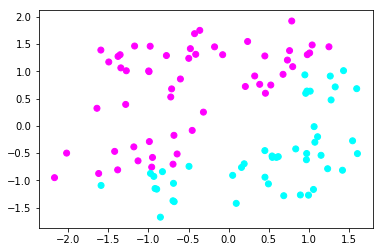

In [10]:
# Tanítás/Tesztelés indítása
network.reset()


#HF2 start mini-batch

# I've modified the size of the validation set, so the training set have 704 elements
# 704 can be devided by 16 without any remaining elements
# In this way, it's easier to create the mini batches
learn(network, X, Y, 0.196, 0.1)
#HF2 start mini-batch

